In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-1.-데이터-핸들링\1. 데이터 핸들링\데이터')

In [6]:
df = pd.read_csv('판매실적통합본.csv', engine = 'python')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [14]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10,10)

In [8]:
'1' + '2'

'12'

In [9]:
df['분기'] = df['년도(year)'].astype(str) + '-' + df['분기(4)'].astype(str)
df['분기'].head()

0    2016-1분기
1    2016-1분기
2    2016-1분기
3    2016-1분기
4    2016-1분기
Name: 분기, dtype: object

In [10]:
grouped_df = df.groupby(['분기', '대리점'], as_index = False)['수량'].sum()
grouped_df

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010
...,...,...,...
145,2019-3분기,대리점 5,82314
146,2019-3분기,대리점 6,6252
147,2019-3분기,대리점 7,30405
148,2019-3분기,대리점 8,10096


#### pyplot을 이용한 그래프 그리기

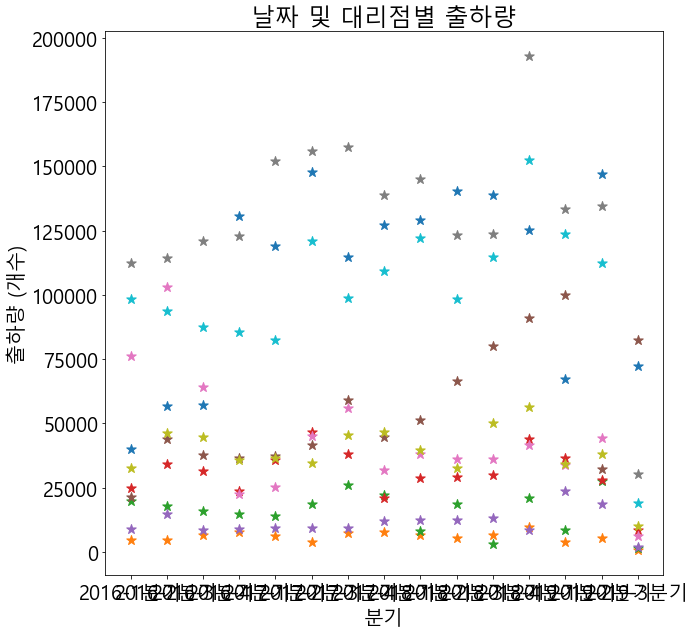

In [15]:
plt.title('날짜 및 대리점별 출하량')
plt.xlabel('분기')
plt.ylabel('출하량 (개수)')

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()
plt.xticks(xtick_range, xtick_label)

for agent in grouped_df['대리점'].unique():
    cond = grouped_df['대리점'] == agent
    plt.scatter(grouped_df.loc[cond]['분기'], grouped_df.loc[cond]['수량'], s = 100, marker = '*')

#### DataFrame을 이용하여 직접 그래프 그리기

In [16]:
grouped_df.head() 
# 대리점별로 데이터를 나누거나, pivot을 해야만 df.plot을 이용하기 적합해짐

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010


In [17]:
pivot_df = pd.pivot_table(data = grouped_df, values = '수량', index = '분기', columns = '대리점', aggfunc = 'sum')
pivot_df = pivot_df.add_suffix("_출하량") # 대리점명이 전부 컬럼으로 되기 때문에, suffix를 추가시킴

pivot_df

대리점,대리점 1_출하량,대리점 10_출하량,대리점 2_출하량,대리점 3_출하량,대리점 4_출하량,대리점 5_출하량,대리점 6_출하량,대리점 7_출하량,대리점 8_출하량,대리점 9_출하량
분기,,,,,,,,,,
2016-1분기,39934,4525,19787,24723,9010,21249,76005,112276,32743,98266
2016-2분기,56799,4519,17783,34247,14592,43818,103226,114176,46088,93726
2016-3분기,57184,6701,15878,31367,8300,37634,63977,120829,44548,87417
2016-4분기,130682,7704,14592,23857,8780,36622,22512,122822,35805,85516
2017-1분기,119085,6027,13951,35692,9375,37151,25148,152077,36627,82569
2017-2분기,147784,3780,18633,46604,9357,41749,45136,155935,34654,120782
2017-3분기,114819,7356,25919,37974,9397,59254,56074,157376,45479,98911
2017-4분기,126994,7853,22245,21024,11952,44728,31915,138685,46461,109366
2018-1분기,129271,6554,8176,28597,12280,51422,38133,144976,39479,121972


In [18]:
pivot_df['분기'] = list(range(len(pivot_df))) # x축에 쓰기 위해 임의의 변수를 생성함
pivot_df['분기'].head()

분기
2016-1분기    0
2016-2분기    1
2016-3분기    2
2016-4분기    3
2017-1분기    4
Name: 분기, dtype: int64

([<matplotlib.axis.XTick at 0x1f62e01e250>,
 [Text(0, 0, '2016-1분기'),
  Text(0, 0, '2016-2분기'),
  Text(0, 0, '2016-3분기'),
  Text(0, 0, '2016-4분기'),
  Text(0, 0, '2017-1분기'),
  Text(0, 0, '2017-2분기'),
  Text(0, 0, '2017-3분기'),
  Text(0, 0, '2017-4분기'),
  Text(0, 0, '2018-1분기'),
  Text(0, 0, '2018-2분기'),
  Text(0, 0, '2018-3분기'),
  Text(0, 0, '2018-4분기'),
  Text(0, 0, '2019-1분기'),
  Text(0, 0, '2019-2분기'),
  Text(0, 0, '2019-3분기')])

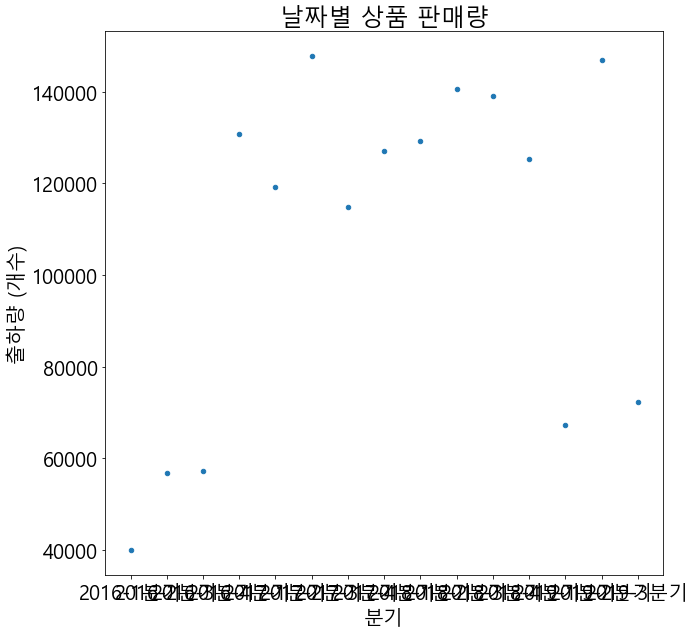

In [19]:
# 그래프 기본 설정
pivot_df.plot(kind = 'scatter', x = '분기', y = '대리점 1_출하량')
plt.title("날짜별 상품 판매량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()

plt.xticks(xtick_range, xtick_label)